# initial

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import scipy.stats as stats
from pathlib import Path

def fire_extiction_analysis(base_folder):
    model_files = sorted(glob.glob(f"{base_folder}/model_data_iter*.csv"))
    
    analysis_data = pd.DataFrame(columns=['simulation_id', 'list_of_active_fires','steps_needed_to_extinguish',"emissions", "cost", "water", "distance"])

    #* loop through all the model files in the folder
    for model_file in model_files:
        
        #* read the model data 
        model_data = pd.read_csv(model_file)
        model_id = Path(model_file).stem.split('_')[-1]
    
    
        
        #* collect the fire data
        active_fires = list(model_data['ActiveFires'])
        
        steps_needed_to_extinguish = len([fire for fire in active_fires if fire != 0])        
        
        #* collect the cost data 
        
        if steps_needed_to_extinguish < len(model_data):
            cost_at_extinguish = model_data['Cost'].iloc[steps_needed_to_extinguish]
        else:
             cost_at_extinguish = model_data['Cost'].iloc[-1]
                
        
        #* collect the emissions data
        
        if steps_needed_to_extinguish < len(model_data):
            emissions_at_extinguish = model_data['TotalEmissions'].iloc[steps_needed_to_extinguish]
        else:
             emissions_at_extinguish = model_data['TotalEmissions'].iloc[-1]
             
        
        #* collect the water data
        
        if steps_needed_to_extinguish < len(model_data):
            water_at_extinguish = model_data['TotalWater'].iloc[steps_needed_to_extinguish]
        else:
             water_at_extinguish = model_data['TotalWater'].iloc[-1]
        
        
        #* collect the distance data
        
        
        #* update the analysis data
        analysis_data.loc[len(analysis_data)] = {
            'simulation_id': model_id,
            'list_of_active_fires': active_fires,
            'steps_needed_to_extinguish': steps_needed_to_extinguish,
            'cost': cost_at_extinguish,
            'emissions': emissions_at_extinguish,
            'water': water_at_extinguish,
        }
        
        


    return analysis_data



import seaborn as sns

folders = [
    "a_star",
    "ABC",
    "Plane",
    "Hybrid",
    "ACO"
]

for folder in folders:

    # folders are in /Users/kaispeidel/Downloads/thesis-1/simulation/comparativeAnalysis
    folder_path = f"/Users/kaispeidel/Downloads/thesis-1/simulation/comparativeAnalysis/{folder}"
    results = fire_extiction_analysis(folder_path)
    results.to_csv(f"/Users/kaispeidel/Downloads/thesis-1/simulation/comparativeAnalysis/collectiveAnalysis/{folder}_analysis.csv", index=False)




In [26]:
abc_data = pd.read_csv("/Users/kaispeidel/Downloads/thesis-1/simulation/comparativeAnalysis/collectiveAnalysis/ABC_analysis.csv")
a_star_data = pd.read_csv("/Users/kaispeidel/Downloads/thesis-1/simulation/comparativeAnalysis/collectiveAnalysis/a_star_analysis.csv")
plane_data = pd.read_csv("/Users/kaispeidel/Downloads/thesis-1/simulation/comparativeAnalysis/collectiveAnalysis/Plane_analysis.csv")
hybrid_data = pd.read_csv("/Users/kaispeidel/Downloads/thesis-1/simulation/comparativeAnalysis/collectiveAnalysis/Hybrid_analysis.csv")
aco_data = pd.read_csv("/Users/kaispeidel/Downloads/thesis-1/simulation/comparativeAnalysis/collectiveAnalysis/ACO_analysis.csv")

In [27]:
# read csv file

a_star_data = pd.read_csv("/Users/kaispeidel/Downloads/thesis-1/simulation/comparativeAnalysis/collectiveAnalysis/a_star_analysis.csv")

abc_data

,simulation_id,list_of_active_fires,steps_needed_to_extinguish,emissions,cost,water,distance
0,iter0,"[50, 50, 50, 50, 49, 47, 46, 46, 45, 44, 44, 4...",164,2374.432881,3220.006421,680,NaN
1,iter1,"[50, 50, 49, 48, 48, 48, 48, 43, 43, 42, 41, 4...",166,2448.954131,3326.753378,740,NaN
2,iter10,"[50, 50, 50, 48, 48, 48, 48, 47, 45, 44, 45, 4...",233,3452.602281,4687.071297,840,NaN
3,iter100,"[50, 50, 50, 49, 49, 49, 48, 47, 47, 47, 45, 4...",194,2684.055528,3628.314722,660,NaN
4,iter101,"[50, 50, 50, 50, 50, 50, 48, 47, 46, 46, 44, 4...",128,1759.399397,2379.157598,710,NaN
...,...,...,...,...,...,...,...
995,iter995,"[50, 50, 50, 50, 50, 50, 50, 50, 48, 48, 46, 4...",139,1835.604891,2476.402126,670,NaN
996,iter996,"[50, 50, 50, 50, 50, 47, 47, 47, 47, 47, 46, 4...",164,2359.460287,3198.250603,640,NaN
997,iter997,"[50, 50, 50, 50, 49, 49, 49, 49, 48, 46, 45, 4...",132,1786.356962,2412.379293,660,NaN
998,iter998,"[50, 50, 50, 50, 50, 49, 49, 49, 49, 48, 47, 4...",1001,15243.513375,21524.343660,670,NaN


In [28]:
# calculate the interquartile range

q1 = a_star_data['steps_needed_to_extinguish'].quantile(0.25)
q3 = a_star_data['steps_needed_to_extinguish'].quantile(0.75)
iqr = q3 - q1

q3


183.25

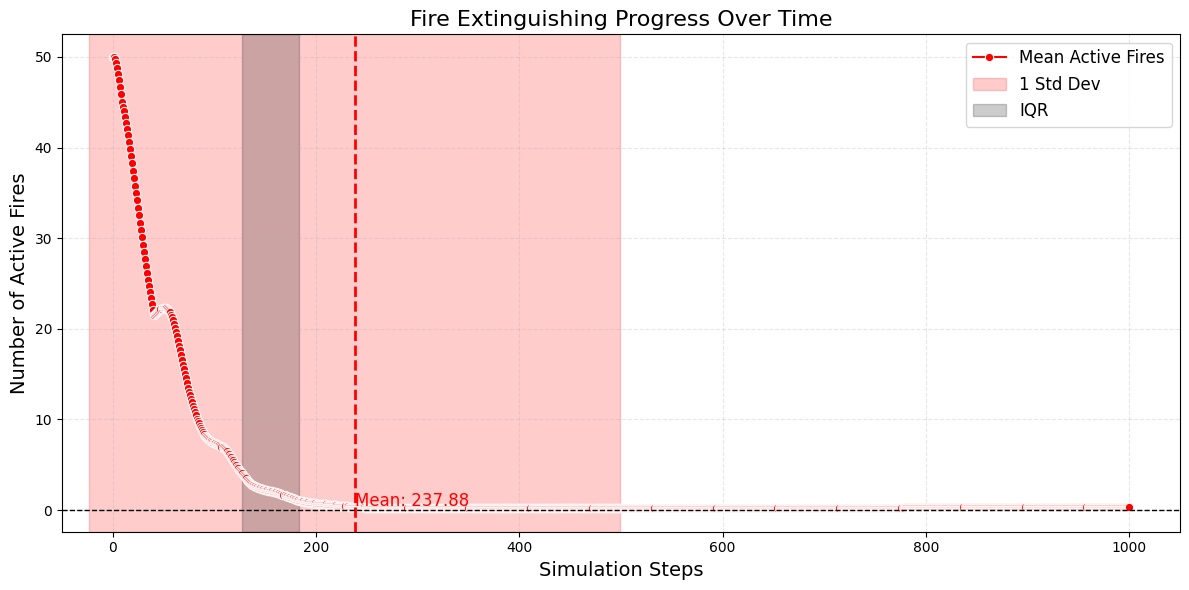

In [29]:
a_star_data['list_of_active_fires'] = a_star_data['list_of_active_fires'].apply(lambda x: eval(x) if isinstance(x, str) else x)

# Create a DataFrame to track fire extinguishing over time across simulations
max_steps = max(len(fires) for fires in a_star_data['list_of_active_fires'])
fire_progression = pd.DataFrame()


mean_steps = a_star_data['steps_needed_to_extinguish'].mean()
std_steps = a_star_data['steps_needed_to_extinguish'].std()

# Process each simulation to get the active fires at each step
for idx, row in a_star_data.iterrows():
    fires = row['list_of_active_fires']
    sim_id = row['simulation_id']
    
    # Pad with zeros if needed to ensure consistent length
    padded_fires = fires + [0] * (max_steps - len(fires))
    
    # Add to the dataframe
    temp_df = pd.DataFrame({
        'simulation_id': sim_id,
        'step': range(len(padded_fires)),
        'active_fires': padded_fires
    })
    fire_progression = pd.concat([fire_progression, temp_df])

# Create a plot showing fires extinguished over time with confidence interval
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=fire_progression,
    x='step',
    y='active_fires',
    errorbar=('ci', 95),
    marker='o',
    markersize=6,
    linestyle='solid',
    color='red',
    label='Mean Active Fires'
)

plt.title("Fire Extinguishing Progress Over Time", fontsize=16)
plt.xlabel("Simulation Steps", fontsize=14)
plt.ylabel("Number of Active Fires", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.3)


#* add mean and std dev lines
plt.axvline(x=mean_steps, color='r', linestyle='--', linewidth=2)
plt.axvspan(mean_steps - std_steps, mean_steps + std_steps, color='red', alpha=0.2, label='1 Std Dev')
plt.text(mean_steps + 0.5, 0.5, f'Mean: {mean_steps:.2f}', color='red', fontsize=12)


#* calculate the interquartile range

q1 = a_star_data['steps_needed_to_extinguish'].quantile(0.25)
q3 = a_star_data['steps_needed_to_extinguish'].quantile(0.75)
iqr = q3 - q1

plt.axvspan(q1, q3, color='black', alpha=0.2, label='IQR')

#* add a line for 0 
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)

plt.legend(fontsize=12)
plt.tight_layout()
plt.show()



# ABC

In [30]:
# read csv file
abc_data

,simulation_id,list_of_active_fires,steps_needed_to_extinguish,emissions,cost,water,distance
0,iter0,"[50, 50, 50, 50, 49, 47, 46, 46, 45, 44, 44, 4...",164,2374.432881,3220.006421,680,NaN
1,iter1,"[50, 50, 49, 48, 48, 48, 48, 43, 43, 42, 41, 4...",166,2448.954131,3326.753378,740,NaN
2,iter10,"[50, 50, 50, 48, 48, 48, 48, 47, 45, 44, 45, 4...",233,3452.602281,4687.071297,840,NaN
3,iter100,"[50, 50, 50, 49, 49, 49, 48, 47, 47, 47, 45, 4...",194,2684.055528,3628.314722,660,NaN
4,iter101,"[50, 50, 50, 50, 50, 50, 48, 47, 46, 46, 44, 4...",128,1759.399397,2379.157598,710,NaN
...,...,...,...,...,...,...,...
995,iter995,"[50, 50, 50, 50, 50, 50, 50, 50, 48, 48, 46, 4...",139,1835.604891,2476.402126,670,NaN
996,iter996,"[50, 50, 50, 50, 50, 47, 47, 47, 47, 47, 46, 4...",164,2359.460287,3198.250603,640,NaN
997,iter997,"[50, 50, 50, 50, 49, 49, 49, 49, 48, 46, 45, 4...",132,1786.356962,2412.379293,660,NaN
998,iter998,"[50, 50, 50, 50, 50, 49, 49, 49, 49, 48, 47, 4...",1001,15243.513375,21524.343660,670,NaN


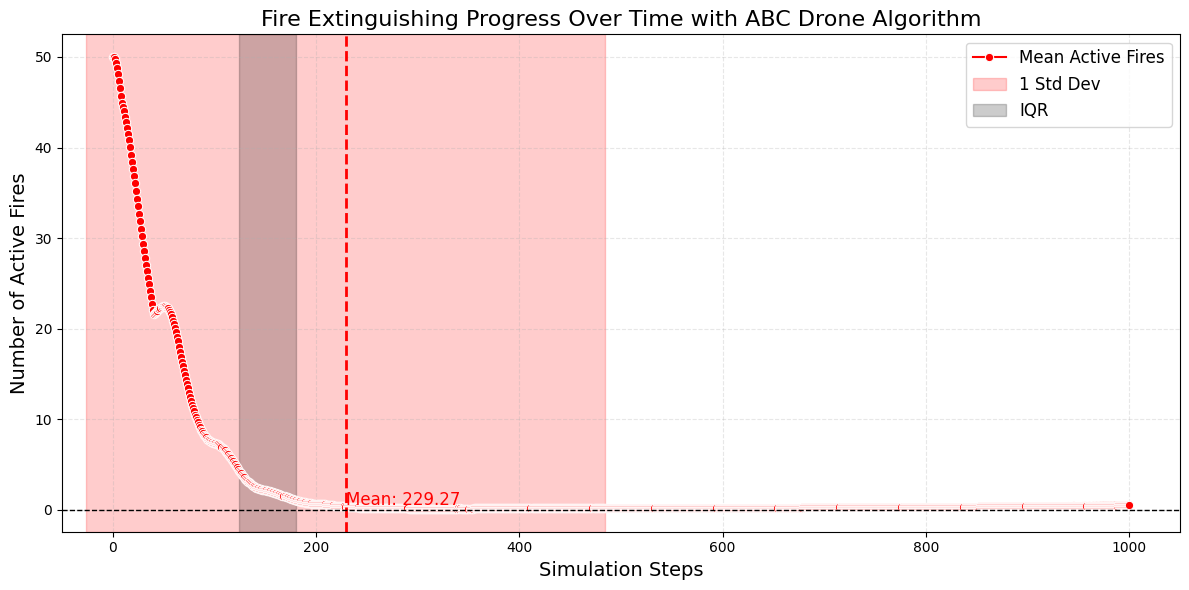

In [31]:
abc_data['list_of_active_fires'] = abc_data['list_of_active_fires'].apply(lambda x: eval(x) if isinstance(x, str) else x)

# Create a DataFrame to track fire extinguishing over time across simulations
max_steps = max(len(fires) for fires in abc_data['list_of_active_fires'])
fire_progression = pd.DataFrame()


mean_steps = abc_data['steps_needed_to_extinguish'].mean()
std_steps = abc_data['steps_needed_to_extinguish'].std()

# Process each simulation to get the active fires at each step
for idx, row in abc_data.iterrows():
    fires = row['list_of_active_fires']
    sim_id = row['simulation_id']
    
    # Pad with zeros if needed to ensure consistent length
    padded_fires = fires + [0] * (max_steps - len(fires))
    
    # Add to the dataframe
    temp_df = pd.DataFrame({
        'simulation_id': sim_id,
        'step': range(len(padded_fires)),
        'active_fires': padded_fires
    })
    fire_progression = pd.concat([fire_progression, temp_df])

# Create a plot showing fires extinguished over time with confidence interval
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=fire_progression,
    x='step',
    y='active_fires',
    errorbar=('ci', 95),
    marker='o',
    markersize=6,
    linestyle='solid',
    color='red',
    label='Mean Active Fires'
)

plt.title("Fire Extinguishing Progress Over Time with ABC Drone Algorithm", fontsize=16)
plt.xlabel("Simulation Steps", fontsize=14)
plt.ylabel("Number of Active Fires", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.3)


#* add mean and std dev lines
plt.axvline(x=mean_steps, color='r', linestyle='--', linewidth=2)
plt.axvspan(mean_steps - std_steps, mean_steps + std_steps, color='red', alpha=0.2, label='1 Std Dev')
plt.text(mean_steps + 0.5, 0.5, f'Mean: {mean_steps:.2f}', color='red', fontsize=12)


#* calculate the interquartile range

q1 = abc_data['steps_needed_to_extinguish'].quantile(0.25)
q3 = abc_data['steps_needed_to_extinguish'].quantile(0.75)
iqr = q3 - q1

plt.axvspan(q1, q3, color='black', alpha=0.2, label='IQR')

#* add a line for 0 
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)

plt.legend(fontsize=12)
plt.tight_layout()
plt.show()



# ACO

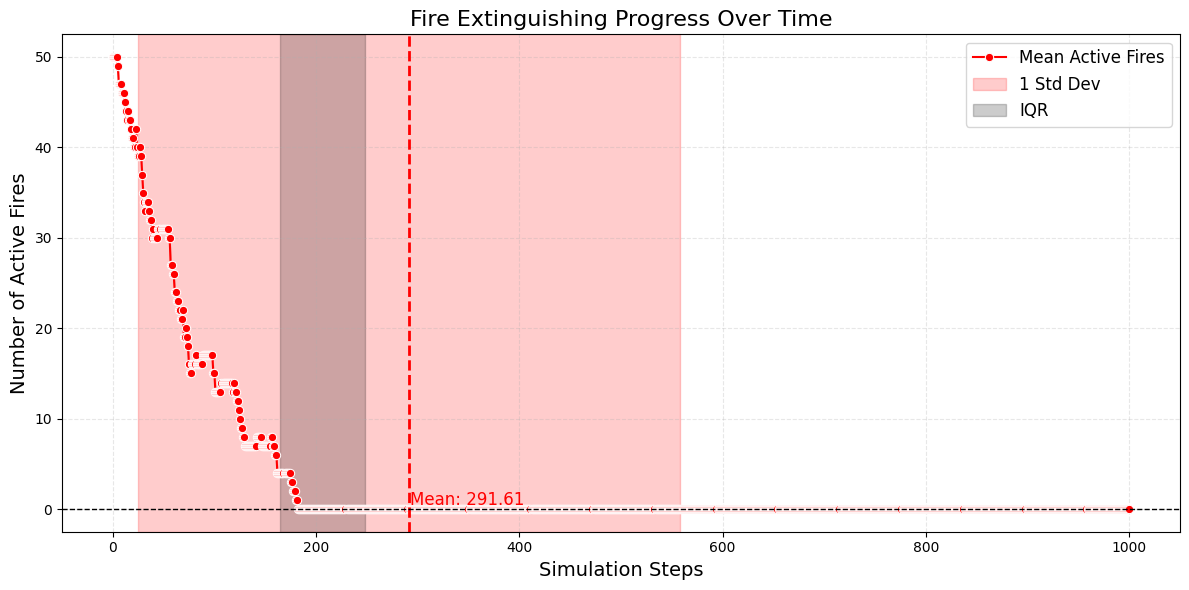

In [34]:
aco_data['list_of_active_fires'] = aco_data['list_of_active_fires'].apply(lambda x: eval(x) if isinstance(x, str) else x)

# Create a DataFrame to track fire extinguishing over time across simulations
max_steps = max(len(fires) for fires in aco_data['list_of_active_fires'])
fire_progression = pd.DataFrame()


mean_steps = aco_data['steps_needed_to_extinguish'].mean()
std_steps = aco_data['steps_needed_to_extinguish'].std()

# Process each simulation to get the active fires at each step
for idx, row in plane_data.iterrows():
    fires = row['list_of_active_fires']
    sim_id = row['simulation_id']
    
    # Pad with zeros if needed to ensure consistent length
    
    # Add to the dataframe
    temp_df = pd.DataFrame({
        'simulation_id': sim_id,
        'step': range(len(padded_fires)),
        'active_fires': padded_fires
    })
    fire_progression = pd.concat([fire_progression, temp_df])

# Create a plot showing fires extinguished over time with confidence interval
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=fire_progression,
    x='step',
    y='active_fires',
    errorbar=('ci', 95),
    marker='o',
    markersize=6,
    linestyle='solid',
    color='red',
    label='Mean Active Fires'
)

plt.title("Fire Extinguishing Progress Over Time", fontsize=16)
plt.xlabel("Simulation Steps", fontsize=14)
plt.ylabel("Number of Active Fires", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.3)


#* add mean and std dev lines
plt.axvline(x=mean_steps, color='r', linestyle='--', linewidth=2)
plt.axvspan(mean_steps - std_steps, mean_steps + std_steps, color='red', alpha=0.2, label='1 Std Dev')
plt.text(mean_steps + 0.5, 0.5, f'Mean: {mean_steps:.2f}', color='red', fontsize=12)


#* calculate the interquartile range

q1 = aco_data['steps_needed_to_extinguish'].quantile(0.25)
q3 = aco_data['steps_needed_to_extinguish'].quantile(0.75)
iqr = q3 - q1

plt.axvspan(q1, q3, color='black', alpha=0.2, label='IQR')

#* add a line for 0 
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)

plt.legend(fontsize=12)
plt.tight_layout()
plt.show()



# plane

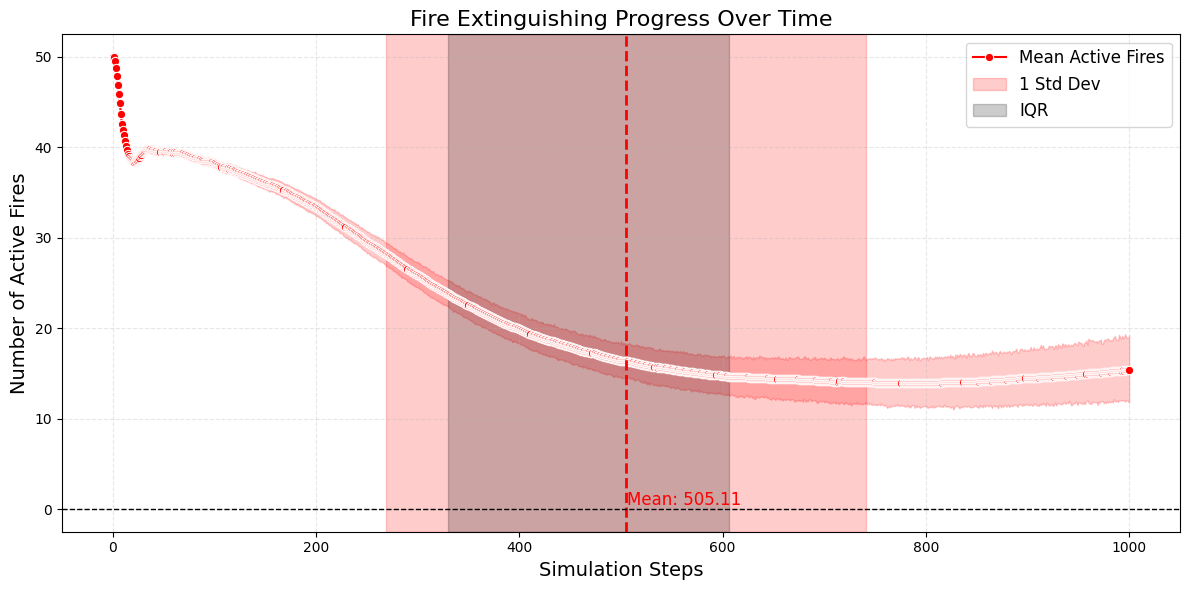

In [35]:
plane_data['list_of_active_fires'] = plane_data['list_of_active_fires'].apply(lambda x: eval(x) if isinstance(x, str) else x)

# Create a DataFrame to track fire extinguishing over time across simulations
max_steps = max(len(fires) for fires in plane_data['list_of_active_fires'])
fire_progression = pd.DataFrame()


mean_steps = plane_data['steps_needed_to_extinguish'].mean()
std_steps = plane_data['steps_needed_to_extinguish'].std()

# Process each simulation to get the active fires at each step
for idx, row in plane_data.iterrows():
    fires = row['list_of_active_fires']
    sim_id = row['simulation_id']
    
    # Pad with zeros if needed to ensure consistent length
    padded_fires = fires + [0] * (max_steps - len(fires))
    
    # Add to the dataframe
    temp_df = pd.DataFrame({
        'simulation_id': sim_id,
        'step': range(len(padded_fires)),
        'active_fires': padded_fires
    })
    fire_progression = pd.concat([fire_progression, temp_df])

# Create a plot showing fires extinguished over time with confidence interval
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=fire_progression,
    x='step',
    y='active_fires',
    errorbar=('ci', 95),
    marker='o',
    markersize=6,
    linestyle='solid',
    color='red',
    label='Mean Active Fires'
)

plt.title("Fire Extinguishing Progress Over Time", fontsize=16)
plt.xlabel("Simulation Steps", fontsize=14)
plt.ylabel("Number of Active Fires", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.3)


#* add mean and std dev lines
plt.axvline(x=mean_steps, color='r', linestyle='--', linewidth=2)
plt.axvspan(mean_steps - std_steps, mean_steps + std_steps, color='red', alpha=0.2, label='1 Std Dev')
plt.text(mean_steps + 0.5, 0.5, f'Mean: {mean_steps:.2f}', color='red', fontsize=12)


#* calculate the interquartile range

q1 = plane_data['steps_needed_to_extinguish'].quantile(0.25)
q3 = plane_data['steps_needed_to_extinguish'].quantile(0.75)
iqr = q3 - q1

plt.axvspan(q1, q3, color='black', alpha=0.2, label='IQR')

#* add a line for 0 
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)

plt.legend(fontsize=12)
plt.tight_layout()
plt.show()



# hybrid

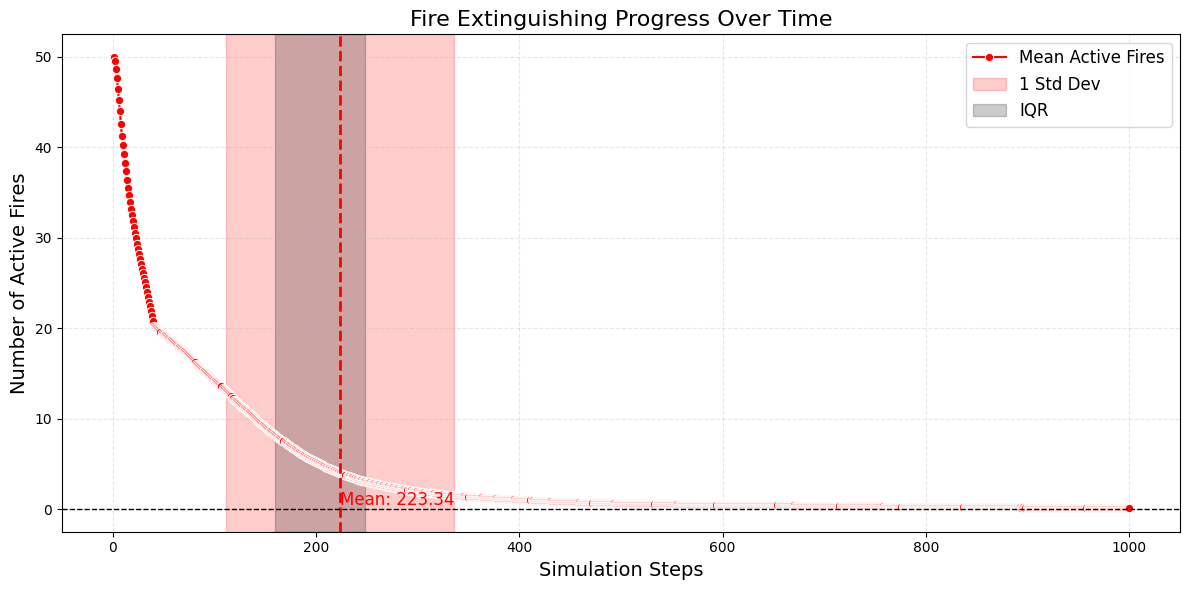

In [36]:
hybrid_data['list_of_active_fires'] = hybrid_data['list_of_active_fires'].apply(lambda x: eval(x) if isinstance(x, str) else x)

# Create a DataFrame to track fire extinguishing over time across simulations
max_steps = max(len(fires) for fires in hybrid_data['list_of_active_fires'])
fire_progression = pd.DataFrame()


mean_steps = hybrid_data['steps_needed_to_extinguish'].mean()
std_steps = hybrid_data['steps_needed_to_extinguish'].std()

# Process each simulation to get the active fires at each step
for idx, row in hybrid_data.iterrows():
    fires = row['list_of_active_fires']
    sim_id = row['simulation_id']
    
    # Pad with zeros if needed to ensure consistent length
    padded_fires = fires + [0] * (max_steps - len(fires))
    
    # Add to the dataframe
    temp_df = pd.DataFrame({
        'simulation_id': sim_id,
        'step': range(len(padded_fires)),
        'active_fires': padded_fires
    })
    fire_progression = pd.concat([fire_progression, temp_df])

# Create a plot showing fires extinguished over time with confidence interval
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=fire_progression,
    x='step',
    y='active_fires',
    errorbar=('ci', 95),
    marker='o',
    markersize=6,
    linestyle='solid',
    color='red',
    label='Mean Active Fires'
)

plt.title("Fire Extinguishing Progress Over Time", fontsize=16)
plt.xlabel("Simulation Steps", fontsize=14)
plt.ylabel("Number of Active Fires", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.3)


#* add mean and std dev lines
plt.axvline(x=mean_steps, color='r', linestyle='--', linewidth=2)
plt.axvspan(mean_steps - std_steps, mean_steps + std_steps, color='red', alpha=0.2, label='1 Std Dev')
plt.text(mean_steps + 0.5, 0.5, f'Mean: {mean_steps:.2f}', color='red', fontsize=12)


#* calculate the interquartile range

q1 = hybrid_data['steps_needed_to_extinguish'].quantile(0.25)
q3 = hybrid_data['steps_needed_to_extinguish'].quantile(0.75)
iqr = q3 - q1

plt.axvspan(q1, q3, color='black', alpha=0.2, label='IQR')

#* add a line for 0 
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)

plt.legend(fontsize=12)
plt.tight_layout()
plt.show()



# further analysis

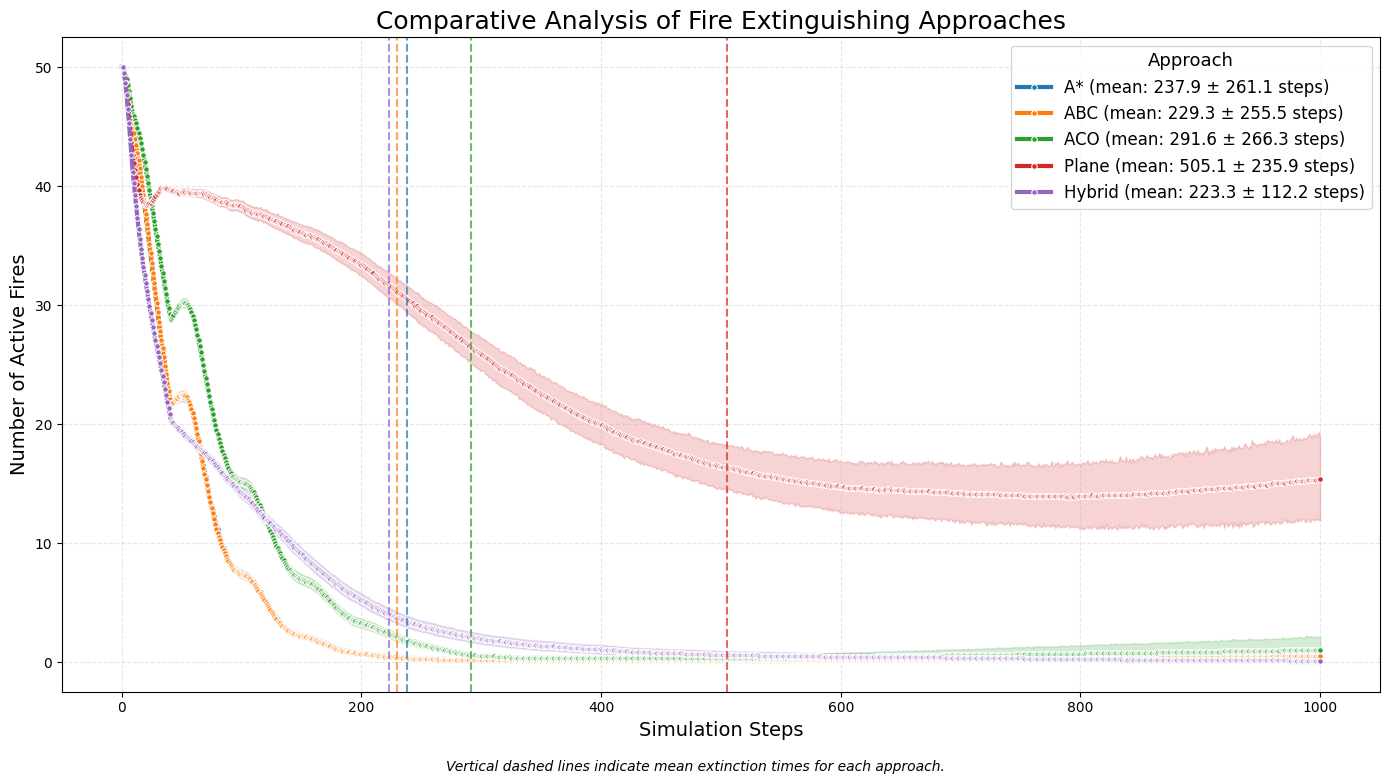

In [37]:
# Create a comparative plot for all five approaches
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D

# Function to process data for plotting
def process_fire_data(data, approach_name):
    # Convert string representation of lists to actual lists
    data['list_of_active_fires'] = data['list_of_active_fires'].apply(lambda x: eval(x) if isinstance(x, str) else x)
    
    # Create a DataFrame to track fire progression
    max_steps = max(len(fires) for fires in data['list_of_active_fires'])
    fire_progression = pd.DataFrame()
    
    # Process each simulation
    for idx, row in data.iterrows():
        fires = row['list_of_active_fires']
        sim_id = row['simulation_id']
        
        # Pad with zeros if needed
        padded_fires = fires + [0] * (max_steps - len(fires))
        
        # Add to the dataframe
        temp_df = pd.DataFrame({
            'simulation_id': sim_id,
            'step': range(len(padded_fires)),
            'active_fires': padded_fires,
            'approach': approach_name
        })
        fire_progression = pd.concat([fire_progression, temp_df])
    
    return fire_progression

# Process data for each approach
a_star_progression = process_fire_data(a_star_data, "A*")
abc_progression = process_fire_data(abc_data, "ABC")
aco_progression = process_fire_data(aco_data, "ACO")
plane_progression = process_fire_data(plane_data, "Plane")
hybrid_progression = process_fire_data(hybrid_data, "Hybrid")

# Combine all data
all_data = pd.concat([a_star_progression, abc_progression, aco_progression, plane_progression, hybrid_progression])

# Create the comparative plot
plt.figure(figsize=(14, 8))

# Plot with different colors for each approach
sns.lineplot(
    data=all_data,
    x='step',
    y='active_fires',
    hue='approach',
    palette='tab10',
    errorbar=('ci', 95),
    marker='o',
    markersize=4,
    linewidth=3,
)

# Enhance the plot
plt.title("Comparative Analysis of Fire Extinguishing Approaches", fontsize=18)
plt.xlabel("Simulation Steps", fontsize=14)
plt.ylabel("Number of Active Fires", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.3)

# Store the existing legend handles and labels
handles, labels = plt.gca().get_legend_handles_labels()

# Add annotations with mean steps needed to extinguish
approaches = ["A*", "ABC", "ACO", "Plane", "Hybrid"]
datasets = [a_star_data, abc_data, aco_data, plane_data, hybrid_data]
colors = plt.cm.tab10(range(len(approaches)))  # Get distinct colors

# Calculate mean extinction times and draw vertical lines
for i, (approach, data, color) in enumerate(zip(approaches, datasets, colors)):
    mean_steps = data['steps_needed_to_extinguish'].mean()
    plt.axvline(x=mean_steps, color=color, linestyle='--', alpha=0.7)

# Create enhanced legend labels with mean extinction times
enhanced_labels = []
for i, (approach, data) in enumerate(zip(approaches, datasets)):
    mean_steps = data['steps_needed_to_extinguish'].mean()
    std_steps = data['steps_needed_to_extinguish'].std()
    enhanced_labels.append(f"{approach} (mean: {mean_steps:.1f} ± {std_steps:.1f} steps)")

# Create a new legend with enhanced labels
plt.legend(handles=handles, labels=enhanced_labels, title="Approach", fontsize=12, title_fontsize=13)

# Add a note about the vertical lines
plt.figtext(0.5, 0.01, 
           "Vertical dashed lines indicate mean extinction times for each approach.",
           ha="center", fontsize=10, fontstyle="italic")

plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.show()

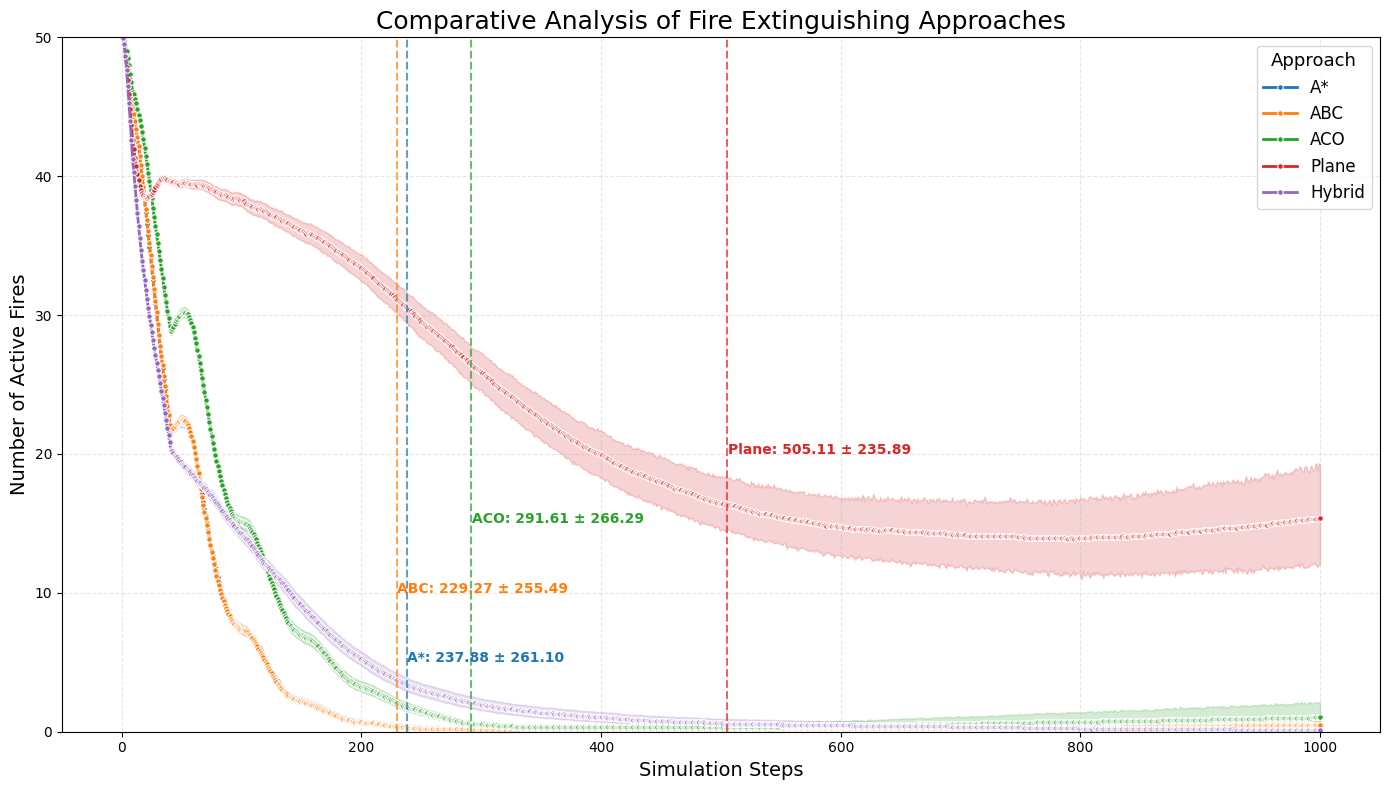

In [38]:
# Create the comparative plot
plt.figure(figsize=(14, 8))

# Plot with different colors for each approach
sns.lineplot(
    data=all_data,
    x='step',
    y='active_fires',
    hue='approach',
    palette='tab10',
    errorbar=('ci', 95),
    marker='o',
    markersize=4,
    linewidth=2,
)

# Enhance the plot
plt.title("Comparative Analysis of Fire Extinguishing Approaches", fontsize=18)
plt.xlabel("Simulation Steps", fontsize=14)
plt.ylabel("Number of Active Fires", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.3)

# Limit the y-axis to a snapshot of values up to 50
plt.ylim(0, 50)

# Add annotations with mean steps needed to extinguish
approaches = ["A*", "ABC", "ACO","Plane", "Hybrid"]
datasets = [a_star_data, abc_data,aco_data, plane_data, hybrid_data]
colors = plt.cm.tab10(range(4))  # Get distinct colors

# Calculate and mark mean extinction times
y_pos = 5  # Adjusted for the limited y-axis range
for i, (approach, data, color) in enumerate(zip(approaches, datasets, colors)):
    mean_steps = data['steps_needed_to_extinguish'].mean()
    std_steps = data['steps_needed_to_extinguish'].std()
    
    plt.axvline(x=mean_steps, color=color, linestyle='--', alpha=0.7)
    plt.text(mean_steps + 0.5, y_pos + (i * 5), 
             f'{approach}: {mean_steps:.2f} ± {std_steps:.2f}',
             color=color, fontsize=10, fontweight='bold')

plt.legend(title="Approach", fontsize=12, title_fontsize=13)
plt.tight_layout()
plt.show()

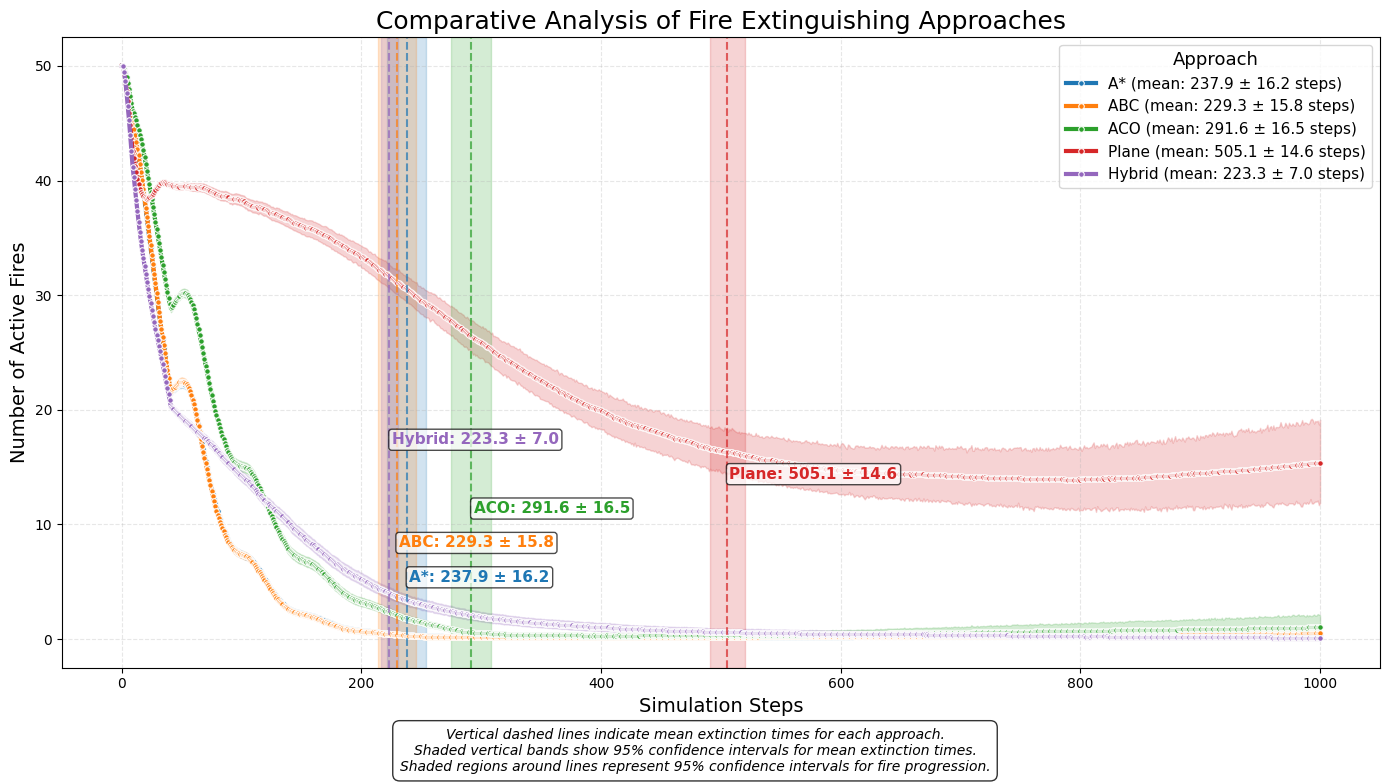

In [39]:
# Create a comparative plot for all five approaches with enhanced confidence intervals
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D
from matplotlib.patches import Rectangle

# Function to process data for plotting (same as before)
def process_fire_data(data, approach_name):
    # Convert string representation of lists to actual lists
    data['list_of_active_fires'] = data['list_of_active_fires'].apply(lambda x: eval(x) if isinstance(x, str) else x)
    
    # Create a DataFrame to track fire progression
    max_steps = max(len(fires) for fires in data['list_of_active_fires'])
    fire_progression = pd.DataFrame()
    
    # Process each simulation
    for idx, row in data.iterrows():
        fires = row['list_of_active_fires']
        sim_id = row['simulation_id']
        
        # Pad with zeros if needed
        padded_fires = fires + [0] * (max_steps - len(fires))
        
        # Add to the dataframe
        temp_df = pd.DataFrame({
            'simulation_id': sim_id,
            'step': range(len(padded_fires)),
            'active_fires': padded_fires,
            'approach': approach_name
        })
        fire_progression = pd.concat([fire_progression, temp_df])
    
    return fire_progression

# Process data for each approach
a_star_progression = process_fire_data(a_star_data, "A*")
abc_progression = process_fire_data(abc_data, "ABC")
aco_progression = process_fire_data(aco_data, "ACO")
plane_progression = process_fire_data(plane_data, "Plane")
hybrid_progression = process_fire_data(hybrid_data, "Hybrid")

# Combine all data
all_data = pd.concat([a_star_progression, abc_progression, aco_progression, plane_progression, hybrid_progression])

# Create the comparative plot
plt.figure(figsize=(14, 8))

# Plot with different colors for each approach and confidence interval
sns.lineplot(
    data=all_data,
    x='step',
    y='active_fires',
    hue='approach',
    palette='tab10',
    errorbar=('ci', 95),  # 95% confidence interval
    marker='o',
    markersize=4,
    linewidth=3,
)

# Enhance the plot
plt.title("Comparative Analysis of Fire Extinguishing Approaches", fontsize=18)
plt.xlabel("Simulation Steps", fontsize=14)
plt.ylabel("Number of Active Fires", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.3)

# Store the existing legend handles and labels
handles, labels = plt.gca().get_legend_handles_labels()

# Add annotations with mean steps needed to extinguish and confidence intervals
approaches = ["A*", "ABC", "ACO", "Plane", "Hybrid"]
datasets = [a_star_data, abc_data, aco_data, plane_data, hybrid_data]
colors = plt.cm.tab10(range(len(approaches)))  # Get distinct colors

# Calculate and visualize mean extinction times with confidence intervals
for i, (approach, data, color) in enumerate(zip(approaches, datasets, colors)):
    # Calculate mean and standard error
    mean_steps = data['steps_needed_to_extinguish'].mean()
    std_steps = data['steps_needed_to_extinguish'].std()
    n = len(data)
    se = std_steps / np.sqrt(n)
    ci_95 = 1.96 * se  # 95% confidence interval
    
    # Draw vertical line at mean
    plt.axvline(x=mean_steps, color=color, linestyle='--', alpha=0.7)
    
    # Add confidence interval for the mean as a shaded vertical region
    plt.axvspan(mean_steps - ci_95, mean_steps + ci_95, 
                color=color, alpha=0.2)
    
    # Add text annotation for the mean value location
    y_pos = 5 + (i * 3)  # Stagger the annotations vertically
    plt.text(mean_steps + 2, y_pos, 
             f"{approach}: {mean_steps:.1f} ± {ci_95:.1f}", 
             color=color, fontsize=11, fontweight='bold',
             bbox=dict(facecolor='white', alpha=0.7, boxstyle='round,pad=0.2'))

# Create enhanced legend labels with mean extinction times and confidence intervals
enhanced_labels = []
for i, (approach, data) in enumerate(zip(approaches, datasets)):
    mean_steps = data['steps_needed_to_extinguish'].mean()
    std_steps = data['steps_needed_to_extinguish'].std()
    n = len(data)
    ci_95 = 1.96 * (std_steps / np.sqrt(n))
    enhanced_labels.append(f"{approach} (mean: {mean_steps:.1f} ± {ci_95:.1f} steps)")

# Create a new legend with enhanced labels
plt.legend(handles=handles, labels=enhanced_labels, title="Approach", fontsize=11, title_fontsize=13)

# Add explanatory notes about the confidence intervals
plt.figtext(0.5, 0.01, 
           "Vertical dashed lines indicate mean extinction times for each approach.\n"
           "Shaded vertical bands show 95% confidence intervals for mean extinction times.\n"
           "Shaded regions around lines represent 95% confidence intervals for fire progression.",
           ha="center", fontsize=10, fontstyle="italic", 
           bbox=dict(facecolor='white', alpha=0.8, boxstyle='round,pad=0.5'))

plt.tight_layout(rect=[0, 0.06, 1, 0.98])
plt.show()

# water analysis

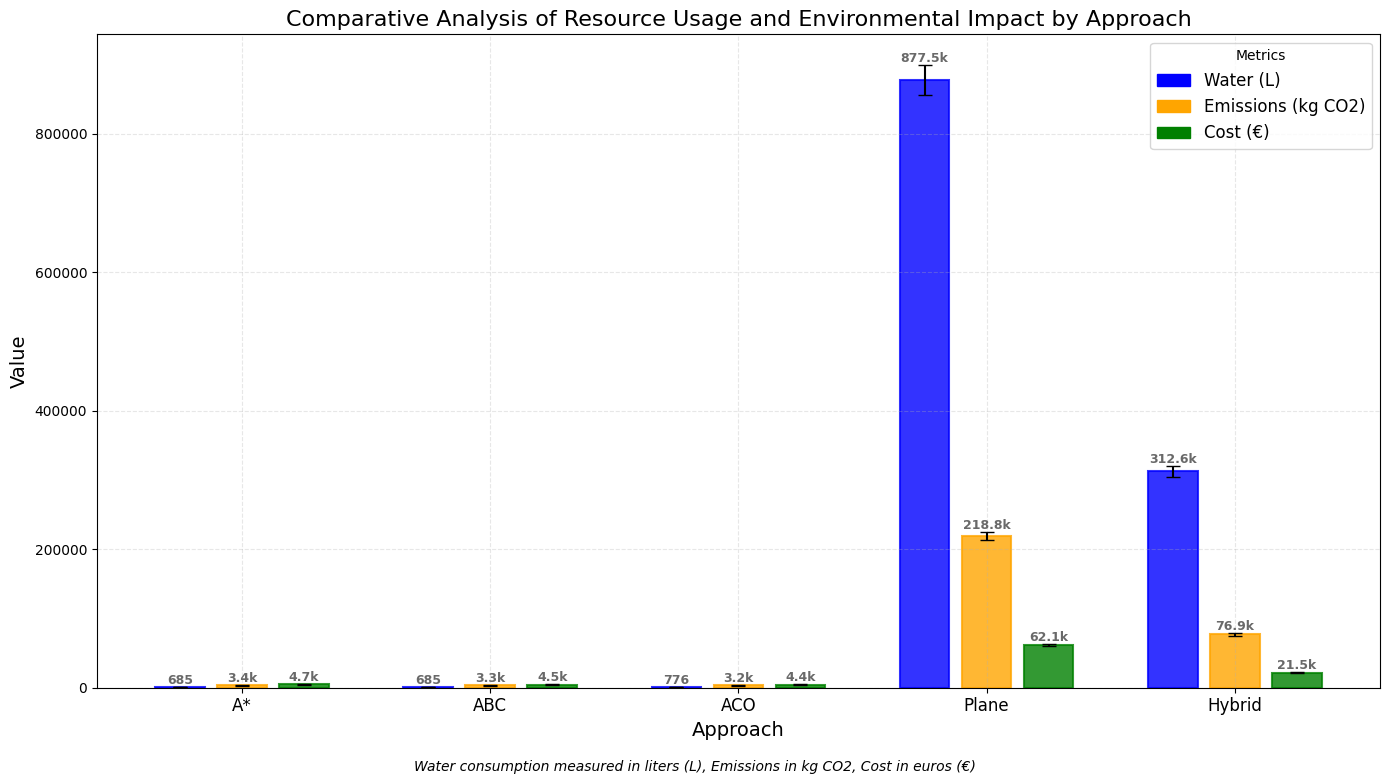

In [42]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch

# Prepare the data for plotting
approaches = ["A*", "ABC", "ACO","Plane", "Hybrid"]
datasets = [a_star_data, abc_data,aco_data, plane_data, hybrid_data]

# Define metrics with their proper units
metrics = ["water", "emissions", "cost"]
metric_labels = {"water": "Water (L)", "emissions": "Emissions (kg CO2)", "cost": "Cost (€)"}
colors = {"water": "blue", "emissions": "orange", "cost": "green"}

# Create data with 95% confidence intervals
enhanced_plot_data = []

for approach, dataset in zip(approaches, datasets):
    for metric in metrics:
        data_values = dataset[metric].dropna().tolist()
        mean_val = np.mean(data_values)
        std_val = np.std(data_values, ddof=1)
        n = len(data_values)
        ci = 1.96 * (std_val / np.sqrt(n)) if n > 1 else 0
        
        enhanced_plot_data.append({
            "Approach": approach,
            "Metric": metric,
            "Metric Label": metric_labels[metric],
            "Mean": mean_val,
            "CI": ci,
            "Data": data_values
        })

enhanced_plot_df = pd.DataFrame(enhanced_plot_data)

# Plot with proper error bars and distinct colors
plt.figure(figsize=(14, 8))

# Create a custom bar plot with CI error bars
for i, metric in enumerate(metrics):
    metric_data = enhanced_plot_df[enhanced_plot_df['Metric'] == metric]
    offset = (i - 1) * 0.25
    
    for j, approach in enumerate(approaches):
        approach_data = metric_data[metric_data['Approach'] == approach]
        mean_val = approach_data['Mean'].values[0]
        ci = approach_data['CI'].values[0]
        
        plt.bar(j + offset, mean_val, width=0.2, 
                color=colors[metric], alpha=0.8,
                edgecolor=colors[metric], linewidth=1.5,
                label=f"{metric_labels[metric]}" if j == 0 else "")
        
        # Add error bars (confidence interval)
        plt.errorbar(j + offset, mean_val, yerr=ci, 
                     fmt='none', color='black', capsize=5)
        
        # Add text labels above bars
        if mean_val > 1000:
            plt.text(j + offset, mean_val + ci + 5, 
                     f"{mean_val/1000:.1f}k", 
                     ha='center', va='bottom', 
                     fontsize=9, fontweight='bold', 
                     color='dimgrey')
        else:
            plt.text(j + offset, mean_val + ci + 5, 
                     f"{int(mean_val)}", 
                     ha='center', va='bottom', 
                     fontsize=9, fontweight='bold', 
                     color='dimgrey')

# Custom legend to avoid duplicates
handles = [Patch(facecolor=colors[m], edgecolor=colors[m], label=metric_labels[m]) for m in metrics]
plt.legend(handles=handles, title="Metrics", fontsize=12)

plt.xticks(range(len(approaches)), approaches, fontsize=12)
plt.grid(linestyle='--', alpha=0.3)
plt.title("Comparative Analysis of Resource Usage and Environmental Impact by Approach", fontsize=16)
plt.xlabel("Approach", fontsize=14)
plt.ylabel("Value", fontsize=14)

# Metric description
plt.figtext(0.5, 0.01, 
           "Water consumption measured in liters (L), Emissions in kg CO2, Cost in euros (€)", 
           ha="center", fontsize=10, fontstyle="italic")

plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.show()

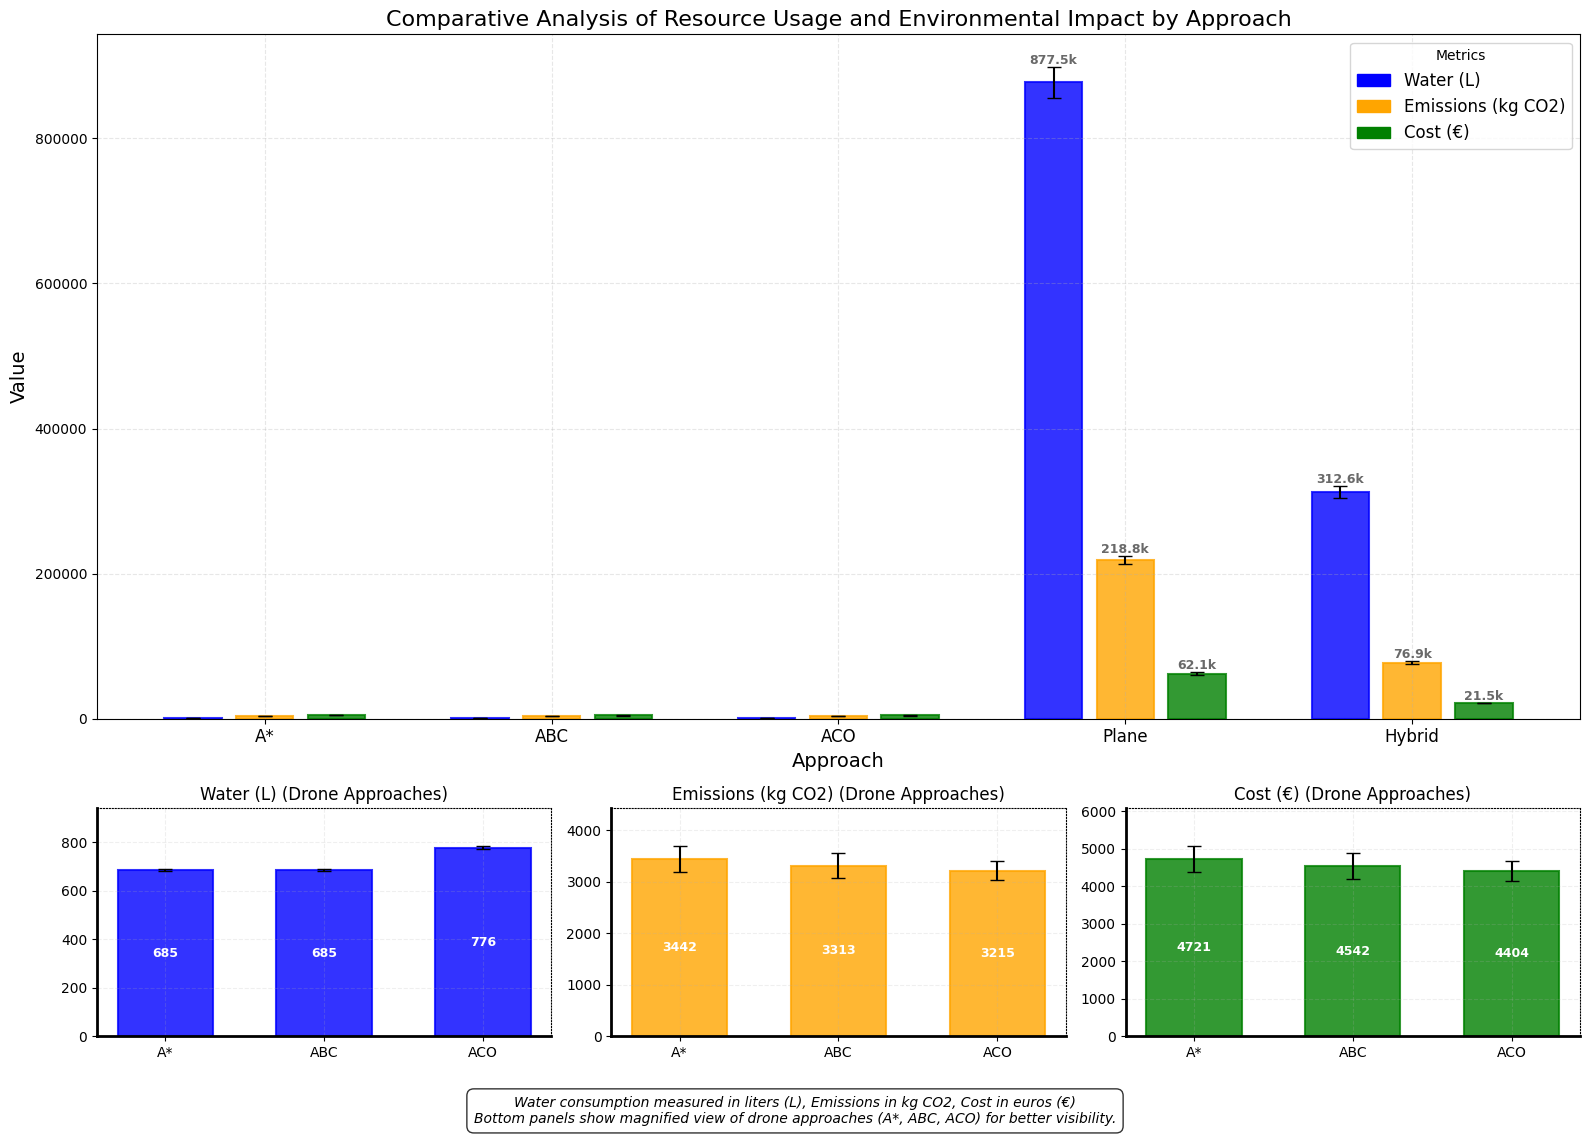

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch, Rectangle, ConnectionPatch
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset

# Prepare the data for plotting
approaches = ["A*", "ABC", "ACO", "Plane", "Hybrid"]
datasets = [a_star_data, abc_data, aco_data, plane_data, hybrid_data]

# Define metrics with their proper units
metrics = ["water", "emissions", "cost"]
metric_labels = {"water": "Water (L)", "emissions": "Emissions (kg CO2)", "cost": "Cost (€)"}
colors = {"water": "blue", "emissions": "orange", "cost": "green"}

# Create data with 95% confidence intervals
enhanced_plot_data = []

for approach, dataset in zip(approaches, datasets):
    for metric in metrics:
        data_values = dataset[metric].dropna().tolist()
        mean_val = np.mean(data_values)
        std_val = np.std(data_values, ddof=1)
        n = len(data_values)
        ci = 1.96 * (std_val / np.sqrt(n)) if n > 1 else 0
        
        enhanced_plot_data.append({
            "Approach": approach,
            "Metric": metric,
            "Metric Label": metric_labels[metric],
            "Mean": mean_val,
            "CI": ci,
            "Data": data_values
        })

enhanced_plot_df = pd.DataFrame(enhanced_plot_data)

# Create figure with subfigure layout
fig = plt.figure(figsize=(16, 12))
gs = fig.add_gridspec(2, 3, height_ratios=[3, 1], width_ratios=[1, 1, 1])

# Main plot in the top row spanning all columns
ax_main = fig.add_subplot(gs[0, :])

# Organize data by metrics to find appropriate zoom ranges
metric_zoom_data = {}
for metric in metrics:
    metric_data = enhanced_plot_df[enhanced_plot_df['Metric'] == metric]
    # Get drone approaches for zoom
    drone_data = metric_data[metric_data['Approach'].isin(["A*", "ABC", "ACO"])]
    if not drone_data.empty:
        max_val = drone_data['Mean'].max() + drone_data['CI'].max()
        margin = max_val * 0.2  # Add 20% margin
        metric_zoom_data[metric] = {
            'max_val': max_val + margin,
            'data': drone_data
        }

# Create the main bar plot
for i, metric in enumerate(metrics):
    metric_data = enhanced_plot_df[enhanced_plot_df['Metric'] == metric]
    offset = (i - 1) * 0.25
    
    for j, approach in enumerate(approaches):
        approach_data = metric_data[metric_data['Approach'] == approach]
        if approach_data.empty:
            continue
            
        mean_val = approach_data['Mean'].values[0]
        ci = approach_data['CI'].values[0]
        
        bar = ax_main.bar(j + offset, mean_val, width=0.2, 
                color=colors[metric], alpha=0.8,
                edgecolor=colors[metric], linewidth=1.5,
                label=f"{metric_labels[metric]}" if j == 0 else "")
        
        # Add error bars (confidence interval)
        ax_main.errorbar(j + offset, mean_val, yerr=ci, 
                     fmt='none', color='black', capsize=5)
        
        # Add text labels above bars for larger values
        if approach in ["Plane", "Hybrid"]:
            if mean_val > 1000:
                ax_main.text(j + offset, mean_val + ci + 5, 
                         f"{mean_val/1000:.1f}k", 
                         ha='center', va='bottom', 
                         fontsize=9, fontweight='bold', 
                         color='dimgrey')
            else:
                ax_main.text(j + offset, mean_val + ci + 5, 
                         f"{int(mean_val)}", 
                         ha='center', va='bottom', 
                         fontsize=9, fontweight='bold', 
                         color='dimgrey')

# Enhance main plot
ax_main.set_xticks(range(len(approaches)))
ax_main.set_xticklabels(approaches, fontsize=12)
ax_main.grid(linestyle='--', alpha=0.3)
ax_main.set_title("Comparative Analysis of Resource Usage and Environmental Impact by Approach", fontsize=16)
ax_main.set_xlabel("Approach", fontsize=14)
ax_main.set_ylabel("Value", fontsize=14)

# Add zoom subplots for each metric
for i, metric in enumerate(metrics):
    if metric in metric_zoom_data:
        # Create subplot for this metric's zoom
        ax_zoom = fig.add_subplot(gs[1, i])
        
        # Plot only drone approaches in the zoomed view
        zoom_data = metric_zoom_data[metric]['data']
        max_val = metric_zoom_data[metric]['max_val']
        
        # Get just the drone approaches
        drone_approaches = ["A*", "ABC", "ACO"]
        
        for j, approach in enumerate(drone_approaches):
            approach_data = zoom_data[zoom_data['Approach'] == approach]
            if approach_data.empty:
                continue
                
            mean_val = approach_data['Mean'].values[0]
            ci = approach_data['CI'].values[0]
            
            # Find the original position in the main plot
            orig_idx = approaches.index(approach)
            offset = (metrics.index(metric) - 1) * 0.25
            
            # Make the zoom bars wider for better visibility
            bar = ax_zoom.bar(j, mean_val, width=0.6, 
                    color=colors[metric], alpha=0.8,
                    edgecolor=colors[metric], linewidth=1.5)
            
            # Add error bars
            ax_zoom.errorbar(j, mean_val, yerr=ci, 
                         fmt='none', color='black', capsize=5)
            
            # Add value labels inside the bars for improved readability in small values
            ax_zoom.text(j, mean_val/2, 
                     f"{int(mean_val)}", 
                     ha='center', va='center', 
                     fontsize=9, fontweight='bold', 
                     color='white')
        
        # Set zoom plot params
        ax_zoom.set_xticks(range(len(drone_approaches)))
        ax_zoom.set_xticklabels(drone_approaches, fontsize=10)
        ax_zoom.set_title(f"{metric_labels[metric]} (Drone Approaches)", fontsize=12)
        ax_zoom.set_ylim(0, max_val)
        ax_zoom.grid(linestyle='--', alpha=0.2)
        
        # Add a magnifying glass effect indicator
        ax_zoom.spines['top'].set_linestyle(':')
        ax_zoom.spines['right'].set_linestyle(':')
        ax_zoom.spines['bottom'].set_linewidth(2)
        ax_zoom.spines['left'].set_linewidth(2)

# Create a custom legend
handles = [Patch(facecolor=colors[m], edgecolor=colors[m], label=metric_labels[m]) for m in metrics]
ax_main.legend(handles=handles, title="Metrics", fontsize=12, loc='upper right')

# Add explanatory text
plt.figtext(0.5, 0.01, 
           "Water consumption measured in liters (L), Emissions in kg CO2, Cost in euros (€)\nBottom panels show magnified view of drone approaches (A*, ABC, ACO) for better visibility.", 
           ha="center", fontsize=10, fontstyle="italic", 
           bbox=dict(facecolor='white', alpha=0.8, boxstyle='round,pad=0.5'))

plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.savefig("/Users/kaispeidel/Downloads/thesis-1/simulation/plots/enhanced_comparative_analysis.png", dpi=300, bbox_inches='tight')
plt.show()

# compare time to run the different simulations

In [45]:
time_data = pd.read_csv("/Users/kaispeidel/Downloads/thesis-1/simulation/comparativeAnalysis/time_df.csv")

/var/folders/pt/w218tf6j5kz72yf4j8vy4g0r0000gn/T/ipykernel_13353/635773899.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


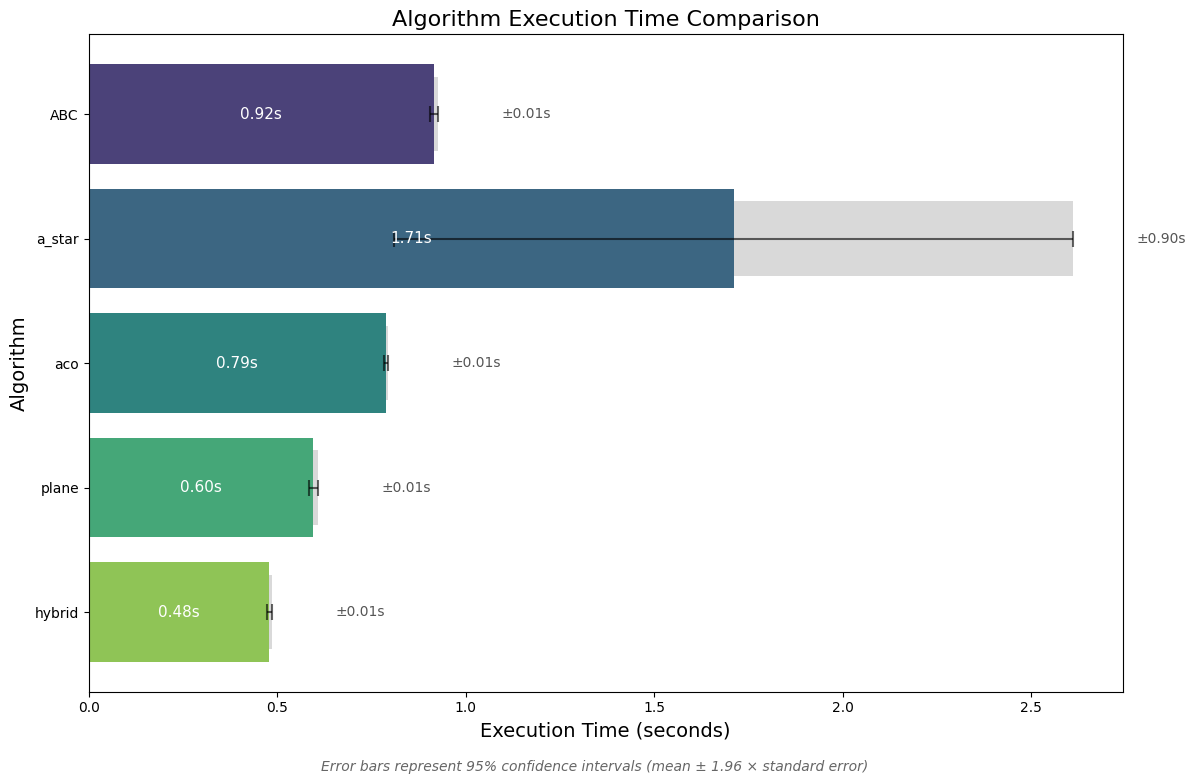

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.patches import Rectangle

time_data = time_data.copy()

plt.figure(figsize=(12, 8))


custom_palette = sns.color_palette("viridis", n_colors=len(time_data['Approach'].unique()))

#* barplot with custom styles
ax = sns.barplot(
    data=time_data, 
    y="Approach", 
    x="Time (s)", 
    errorbar=None,  # We'll add custom error bars
    palette=custom_palette
)

#* labels for the mean values 
for i, algorithm in enumerate(time_data['Approach'].unique()):
    approach_data = time_data[time_data['Approach'] == algorithm]
    mean_value = approach_data['Time (s)'].mean()
    std_dev = approach_data['Time (s)'].std()
    n = len(approach_data)
    
    #* calculate the confidence interval
    ci = 1.96 * std_dev / np.sqrt(n) if n > 1 else 0
    
    #* rectangle for the confidence interval for better readability
    rect = Rectangle((mean_value, i-0.3), ci, 0.6, 
                    color='black', alpha=0.15, linewidth=0)
    ax.add_patch(rect)
    
    #* custom error bar
    plt.errorbar(
        x=mean_value, 
        y=i, 
        xerr=ci,
        fmt='none', 
        color='black', 
        capsize=6,
        capthick=1.5,
        elinewidth=1.5,
        alpha=0.6
    )
    
    #* mean value in the bar
    plt.text(
        mean_value/2, 
        i, 
        f"{mean_value:.2f}s", 
        verticalalignment='center', 
        horizontalalignment='center',
        fontsize=11, 
        color='white'
    )
    
    # Add confidence interval text on the right with clearer formatting
    plt.text(
    mean_value + ci + 0.3, 
    i, 
    f"±{ci:.2f}s", 
    va='center',  # corrected alignment
    ha= 'right',
    fontsize=10,
    color='#555555'
)

# Enhance the plot aesthetics
plt.title("Algorithm Execution Time Comparison", fontsize=16)
plt.ylabel("Algorithm", fontsize=14)
plt.xlabel("Execution Time (seconds)", fontsize=14)


plt.figtext(
    0.5, 0.01, 
    "Error bars represent 95% confidence intervals (mean ± 1.96 × standard error)",
    ha='center', 
    fontsize=10, 
    style='italic',
    color='#666666'
)

plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.savefig("/Users/kaispeidel/Downloads/thesis-1/simulation/plots/algorithm_execution_time_comparison.png", dpi=300)
plt.show()